# Feature Engineering

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams["figure.figsize"] = 15,8
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [23]:
data1 = pd.read_csv("Final_data1.csv")

In [24]:
data1.head()

,Unnamed: 0,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,rp
0,0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,...,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,1460
1,1,24011ae4ebbe3035111d65fa7c15bc57,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,...,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,1096
2,2,d29c2c54acc38ff3c0614d0a653813dd,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,4660,0,0,2009-08-21,2016-08-30,2009-08-21,...,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2566
3,3,764c75f661154dac3a6c254cd082ea7d,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,...,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2192
4,4,bba03439a292a1e166f80264c16191cb,apdekpcbwosbxepsfxclislboipuxpop,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,...,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2192


In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16096 non-null  int64  
 1   id                        16096 non-null  object 
 2   activity_new              16096 non-null  object 
 3   channel_sales             16096 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16096 non-null  object 
 9   date_modif_prod           16096 non-null  object 
 10  date_renewal              16096 non-null  object 
 11  forecast_cons_12m         16096 non-null  float64
 12  forecast_cons_year        16096 non-null  int64  
 13  forecast_discount_energy  16096 non-null  float64
 14  foreca

In [26]:
data1["date_end"] = pd.to_datetime(data1["date_end"])
data1["date_activ"] = pd.to_datetime(data1["date_activ"])
data1["date_renewal"] = pd.to_datetime(data1["date_renewal"])
data1["date_modif_prod"] = pd.to_datetime(data1["date_modif_prod"])

## Retention Period

I already made a feature of retention period of customers during EDA. It contains the no. of days customers remained with the company.

<AxesSubplot:>

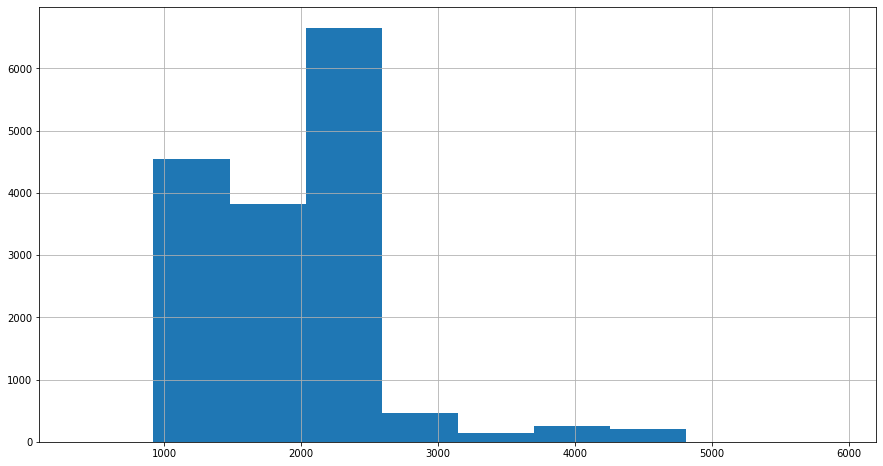

In [27]:
data1["rp"].hist()

## Months of renewal

In [28]:
data1["date_renewal_months"] = data1["date_renewal"].dt.month

<AxesSubplot:>

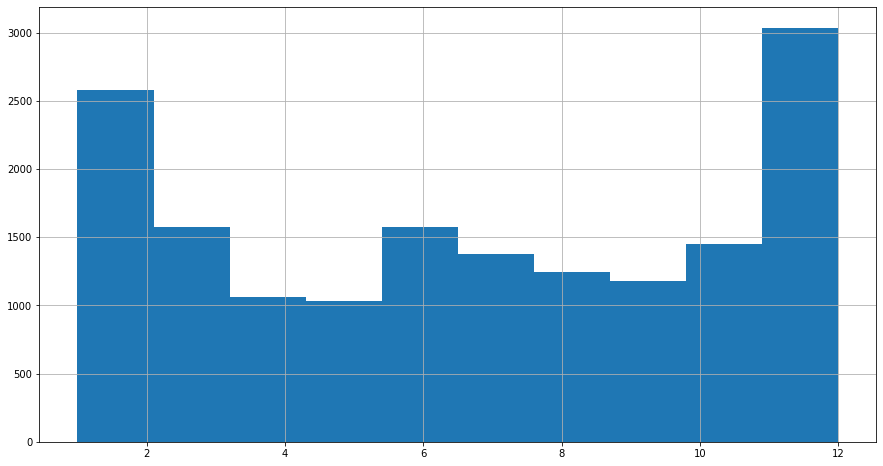

In [29]:
data1["date_renewal_months"].hist()

This new feature tells us in which months renewals were ocurred , and it seems maximum renewals occured in november.

## Months of contract end.

In [30]:
data1["date_end_months"] = data1["date_end"].dt.month

<AxesSubplot:>

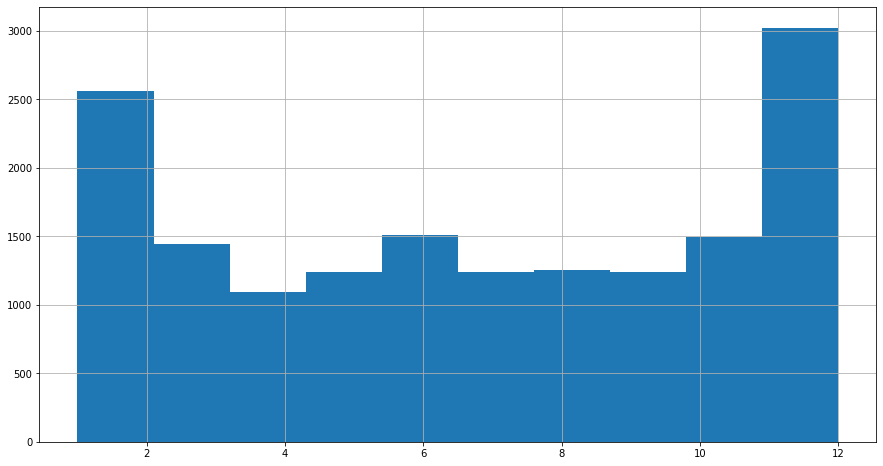

In [31]:
data1["date_end_months"].hist()

This feature will tells us which were the months in which a customers ended their contract .

## activity_new

In [32]:
category_activity = pd.DataFrame({"Activity samples":data1.activity_new.value_counts()})
category_activity

,Activity samples
apdekpcbwosbxepsfxclislboipuxpop,11122
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
ckfxocssowaeipxueikxcmaxdmcduxsa,189
...,...
xumuokeiidieboawuxkidxufcexecbbl,1
dbklukmppmseoekmmxfolmfbdidmawls,1
xscbuwcbpwsilaeadffielubxpfpmpxw,1
oeacexidmflusdkwuuicmpiaklkxulxm,1


It will be better to drop all those variables that is better to drop those quantity that have samples less than 75.

In [33]:
to_replace = list(category_activity[category_activity["Activity samples"]<=75].index)

In [34]:
data1["activity_new"] = data1["activity_new"].replace(to_replace,"null_values_activity")

## Encoding categorical values.

In [35]:
le = LabelEncoder()
for i in ["id","activity_new","channel_sales","origin_up","churn","has_gas"]:
    data1[i] = le.fit_transform(data1[i])

In [15]:
data1.head()

,Unnamed: 0,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,rp,date_renewal_months,date_end_months
0,0,4666,7,5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,...,-41.76,1,1732.36,3,2,180.000,0,1460,11,11
1,1,2361,0,3,0,54946,0,2013-06-15,2016-06-15,2015-11-01,...,25.44,2,678.99,3,3,43.648,1,1096,6,6
2,2,13250,0,4,4660,0,0,2009-08-21,2016-08-30,2009-08-21,...,16.38,1,18.89,6,1,13.800,0,2566,8,8
3,3,7430,0,3,544,0,0,2010-04-16,2016-04-16,2010-04-16,...,28.60,1,6.60,6,1,13.856,0,2192,4,4
4,4,11748,0,5,1584,0,0,2010-03-30,2016-03-30,2010-03-30,...,30.22,1,25.46,6,1,13.200,0,2192,3,3


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                16096 non-null  int64         
 1   id                        16096 non-null  int64         
 2   activity_new              16096 non-null  int64         
 3   channel_sales             16096 non-null  int64         
 4   cons_12m                  16096 non-null  int64         
 5   cons_gas_12m              16096 non-null  int64         
 6   cons_last_month           16096 non-null  int64         
 7   date_activ                16096 non-null  datetime64[ns]
 8   date_end                  16096 non-null  datetime64[ns]
 9   date_modif_prod           16096 non-null  datetime64[ns]
 10  date_renewal              16096 non-null  datetime64[ns]
 11  forecast_cons_12m         16096 non-null  float64       
 12  forecast_cons_year

------------------------------------------------------------------------------------------------------------

## Dropping the dates and unnamed column

In [17]:
data1.drop(["Unnamed: 0","date_activ","date_end","date_modif_prod","date_renewal"],axis = 1,inplace=True)

------------------------------------------------------------------------------------------------------------

## converting channel_sales to category.

<AxesSubplot:>

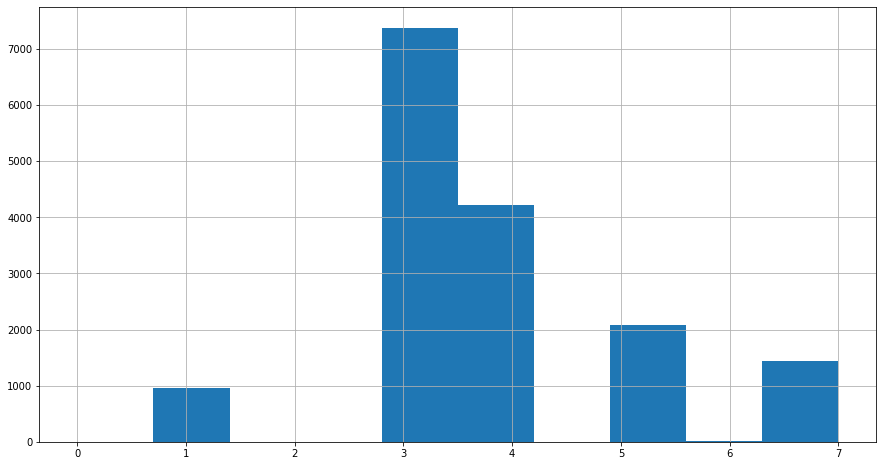

In [18]:
data1["channel_sales"].hist()

We can see that channel sales is more of a categorical variable, hence chanigng its type to category.

In [19]:
data1["channel_sales"] = data1["channel_sales"].astype("category")

------------------------------------------------------------------------------------------------------------

In [20]:
data1.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,rp,date_renewal_months,date_end_months
0,4666,7,5,309275,0,10025,26520.30,10025,0.0,359.29,...,-41.76,1,1732.36,3,2,180.000,0,1460,11,11
1,2361,0,3,0,54946,0,0.00,0,0.0,1.78,...,25.44,2,678.99,3,3,43.648,1,1096,6,6
2,13250,0,4,4660,0,0,189.95,0,0.0,16.27,...,16.38,1,18.89,6,1,13.800,0,2566,8,8
3,7430,0,3,544,0,0,47.96,0,0.0,38.72,...,28.60,1,6.60,6,1,13.856,0,2192,4,4
4,11748,0,5,1584,0,0,240.04,0,0.0,19.83,...,30.22,1,25.46,6,1,13.200,0,2192,3,3


In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        16096 non-null  int64   
 1   activity_new              16096 non-null  int64   
 2   channel_sales             16096 non-null  category
 3   cons_12m                  16096 non-null  int64   
 4   cons_gas_12m              16096 non-null  int64   
 5   cons_last_month           16096 non-null  int64   
 6   forecast_cons_12m         16096 non-null  float64 
 7   forecast_cons_year        16096 non-null  int64   
 8   forecast_discount_energy  16096 non-null  float64 
 9   forecast_meter_rent_12m   16096 non-null  float64 
 10  forecast_price_energy_p1  16096 non-null  float64 
 11  forecast_price_energy_p2  16096 non-null  float64 
 12  forecast_price_pow_p1     16096 non-null  float64 
 13  has_gas                   16096 non-null  int6

## Transforming to Normal Distribution

### cons_ variable

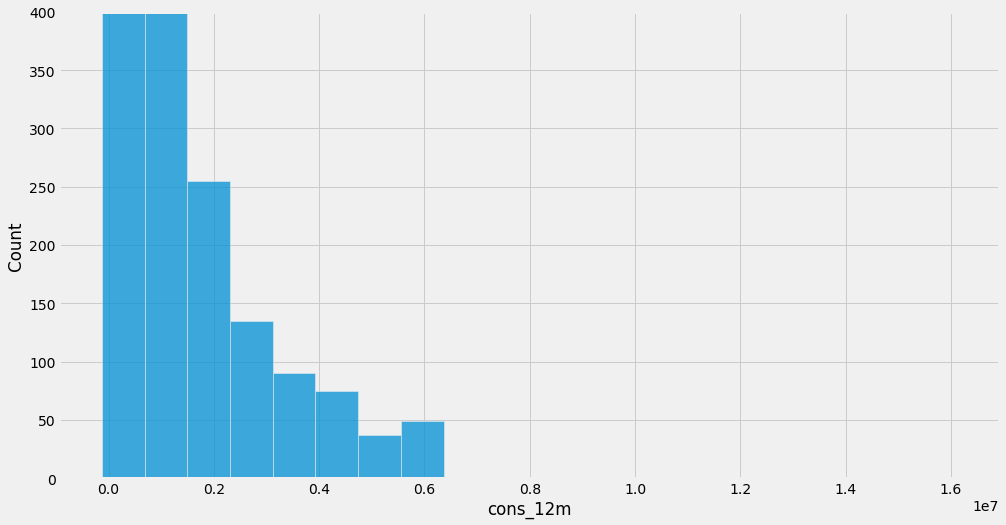

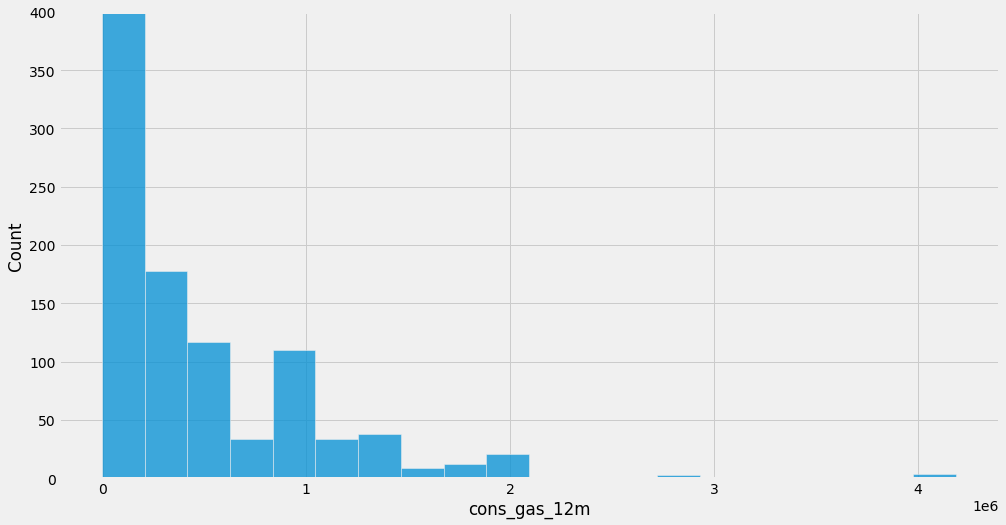

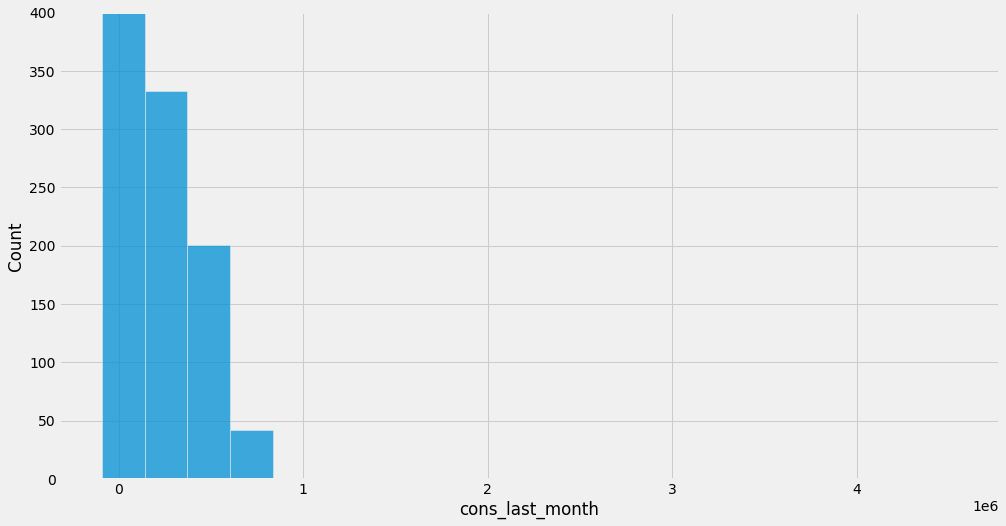

In [22]:
plt.style.use("fivethirtyeight")
sns.histplot(data1["cons_12m"],bins = 20)
plt.ylim(0,400)
plt.show()
sns.histplot(data1["cons_gas_12m"],bins = 20)
plt.ylim(0,400)
plt.show()
sns.histplot(data1["cons_last_month"],bins = 20)
plt.ylim(0,400)
plt.show()

Most of these are right-skewed , so we will apply log - transformation. 

------------------------------------------------------------------------------------------------------------

## forecast_ variable
 forecast_cons_12m          
 forecast_cons_year         
 forecast_discount_energy   
 forecast_meter_rent_12m   
 forecast_price_energy_p1   
 forecast_price_energy_p2  
 forecast_price_pow_p1      

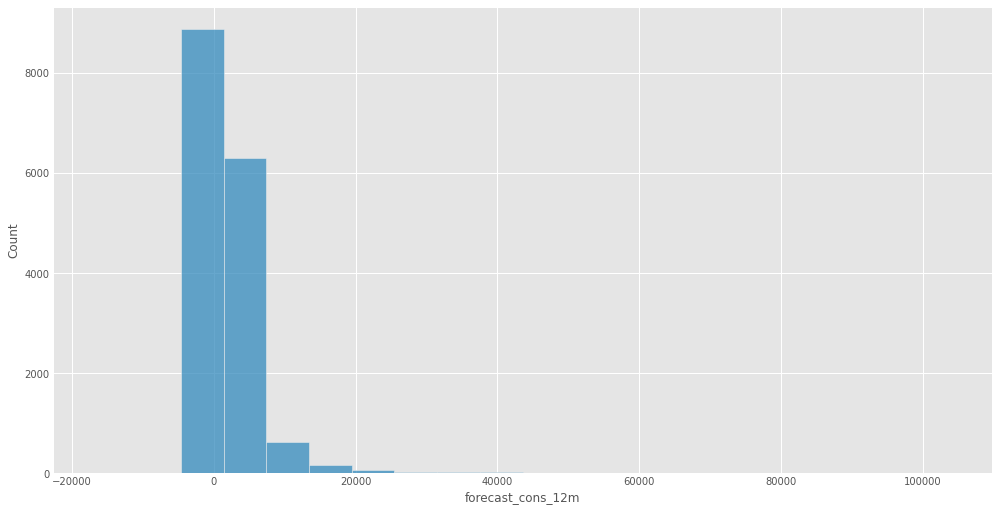

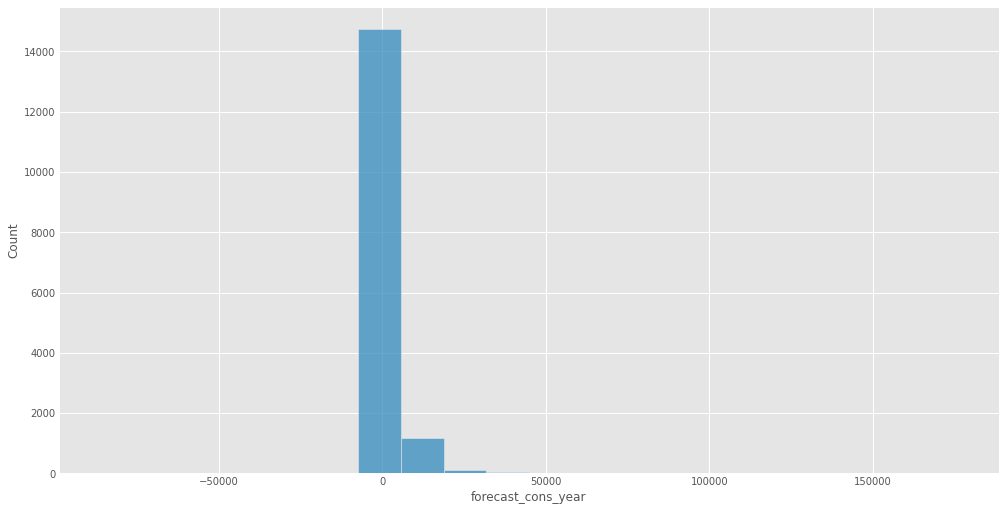

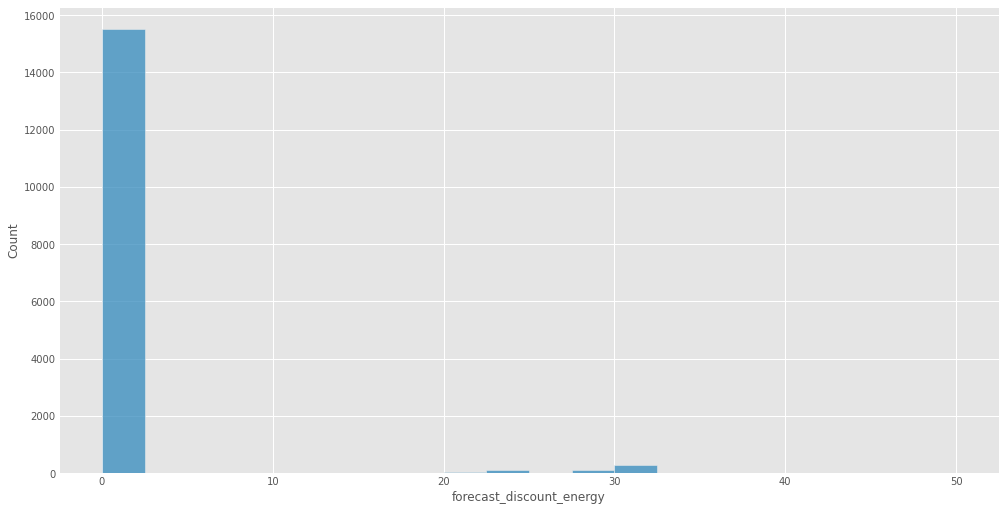

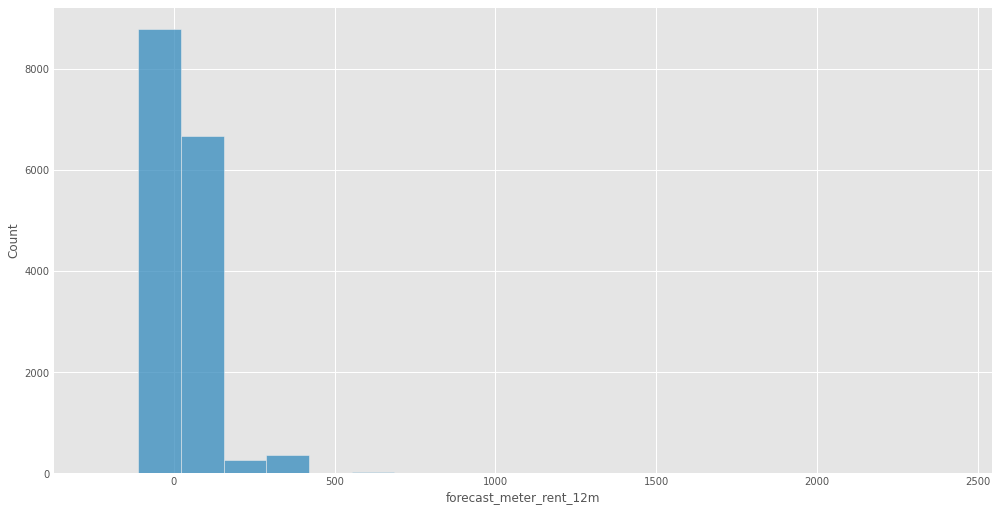

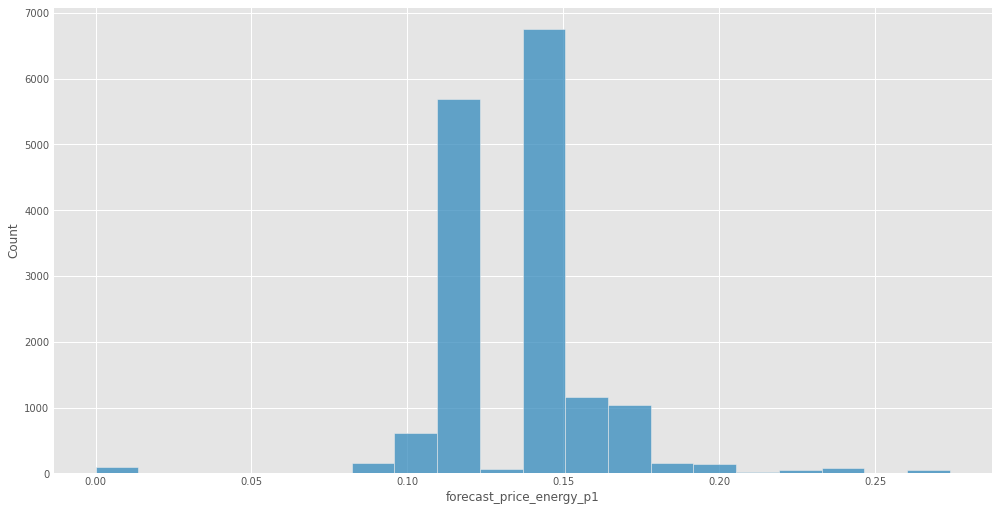

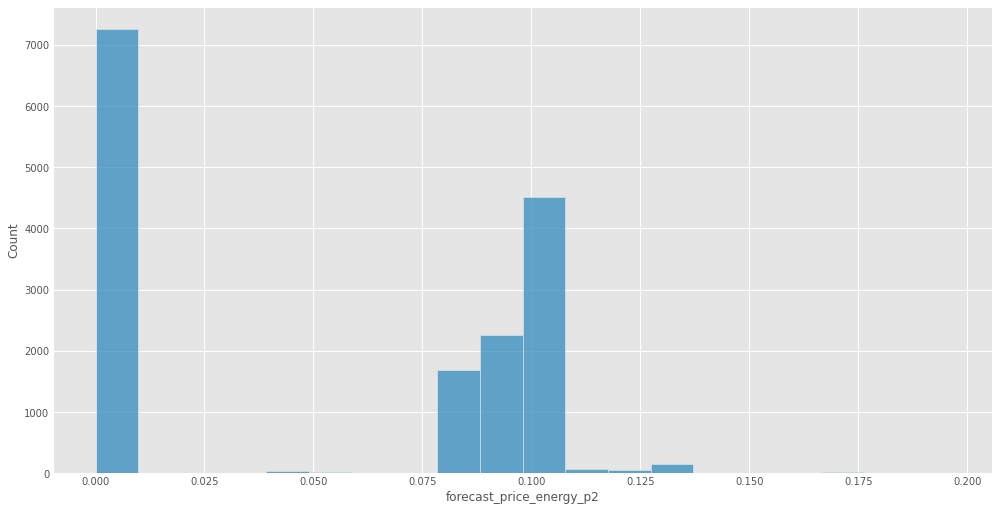

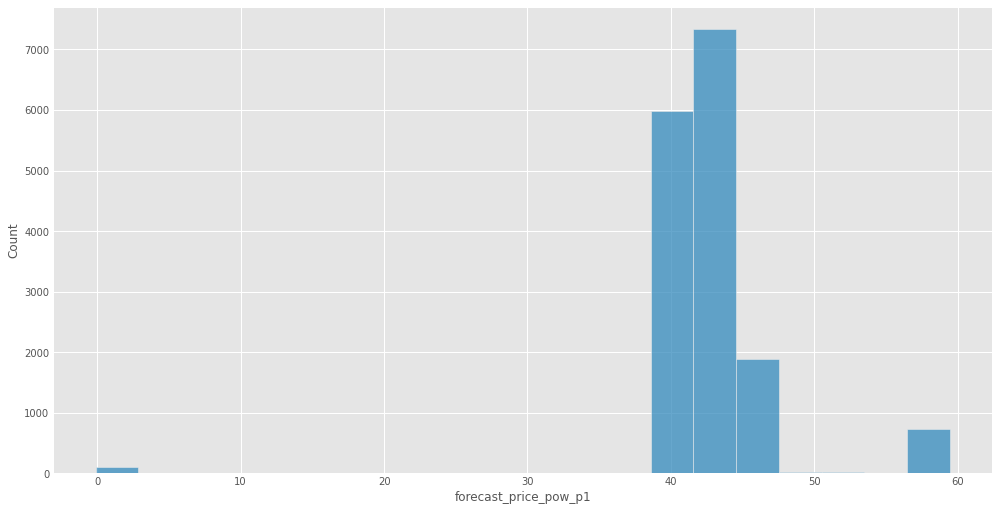

In [23]:
plt.style.use("ggplot")
sns.histplot(data1["forecast_cons_12m"],bins = 20)
plt.show()
sns.histplot(data1["forecast_cons_year"],bins = 20)
plt.show()
sns.histplot(data1["forecast_discount_energy"],bins = 20)
plt.show()
sns.histplot(data1["forecast_meter_rent_12m"],bins = 20)
plt.show()
sns.histplot(data1["forecast_price_energy_p1"],bins = 20)
plt.show()
sns.histplot(data1["forecast_price_energy_p2"],bins = 20)
plt.show()
sns.histplot(data1["forecast_price_pow_p1"],bins = 20)
plt.show()

In [24]:
data1.describe()

,id,activity_new,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,rp,date_renewal_months,date_end_months
count,16096.000000,16096.000000,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,8047.500000,1.937811,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.983785,70.309945,0.135928,...,21.460670,1.347788,217.924819,5.030629,2.211046,20.602869,0.099093,2018.112947,6.656561,6.682281
std,4646.659302,3.039399,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.141470,79.023251,0.026200,...,27.908177,1.459808,366.624768,1.676101,0.853481,21.770600,0.298796,627.273539,3.500424,3.485283
min,0.000000,0.000000,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,...,-615.660000,1.000000,-4148.990000,1.000000,0.000000,1.000000,0.000000,365.000000,1.000000,1.000000
25%,4023.750000,0.000000,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,...,11.950000,1.000000,51.935000,4.000000,1.000000,12.500000,0.000000,1461.000000,3.000000,4.000000
50%,8047.500000,0.000000,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,...,20.970000,1.000000,119.640000,5.000000,2.000000,13.856000,0.000000,1834.000000,7.000000,7.000000
75%,12071.250000,5.000000,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,...,29.640000,1.000000,275.752500,6.000000,3.000000,19.800000,0.000000,2402.000000,10.000000,10.000000
max,16095.000000,9.000000,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,...,374.640000,32.000000,24570.650000,16.000000,4.000000,500.000000,1.000000,5925.000000,12.000000,12.000000


we will treat those variables with larger standard deviation

In [25]:
# Remove negative values
data1.loc[data1.cons_12m < 0,"cons_12m"] = np.nan
data1.loc[data1.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
data1.loc[data1.cons_last_month < 0,"cons_last_month"] = np.nan
data1.loc[data1.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
data1.loc[data1.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
data1.loc[data1.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
data1.loc[data1.imp_cons < 0,"imp_cons"] = np.nan

In [26]:
data1["cons_12m"] = np.log10(data1["cons_12m"]+1)
data1["cons_gas_12m"] = np.log10(data1["cons_gas_12m"]+1)
data1["cons_last_month"] = np.log10(data1["cons_last_month"]+1)
data1["forecast_cons_12m"] = np.log10(data1["forecast_cons_12m"]+1)
data1["forecast_cons_year"] = np.log10(data1["forecast_cons_year"]+1)
data1["forecast_meter_rent_12m"] = np.log10(data1["forecast_meter_rent_12m"]+1)
data1["imp_cons"] = np.log10(data1["imp_cons"]+1)

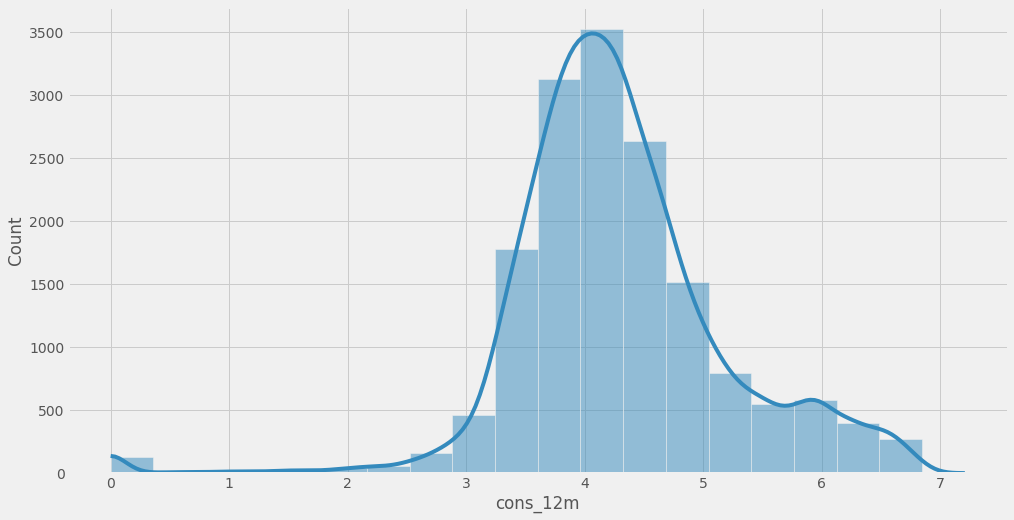

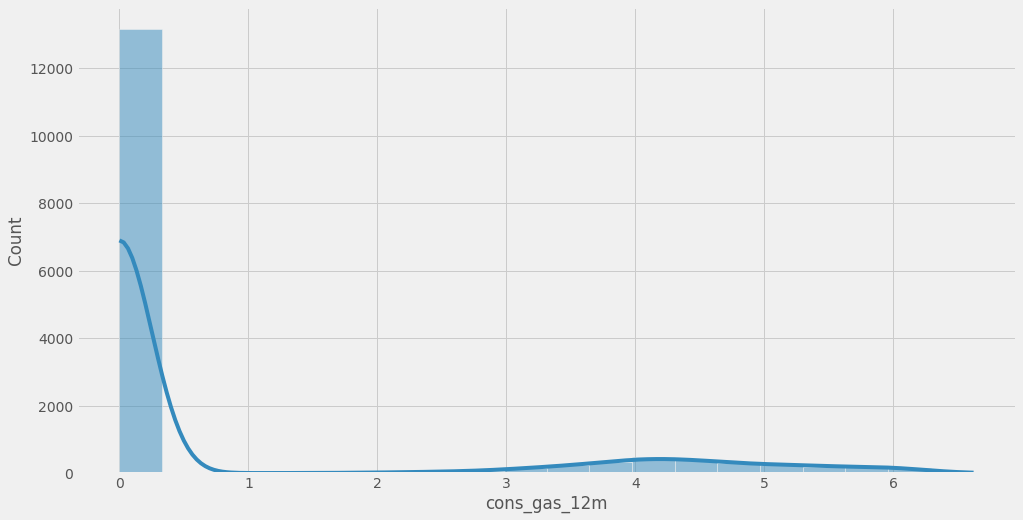

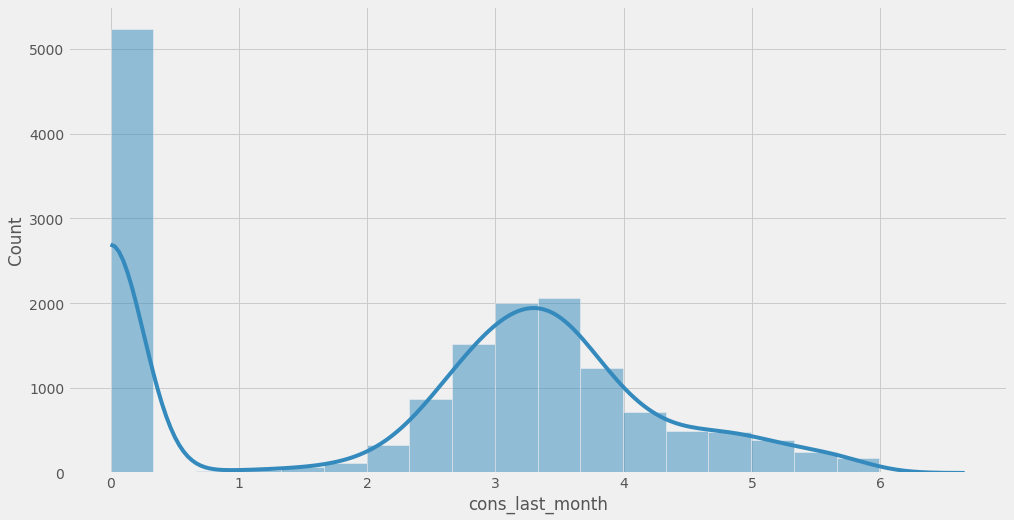

In [28]:
plt.style.use("fivethirtyeight")
sns.histplot(data1["cons_12m"],bins = 20,kde = True)
plt.show()
sns.histplot(data1["cons_gas_12m"],bins = 20,kde = True)
plt.show()
sns.histplot(data1["cons_last_month"],bins = 20 , kde = True)
plt.show()

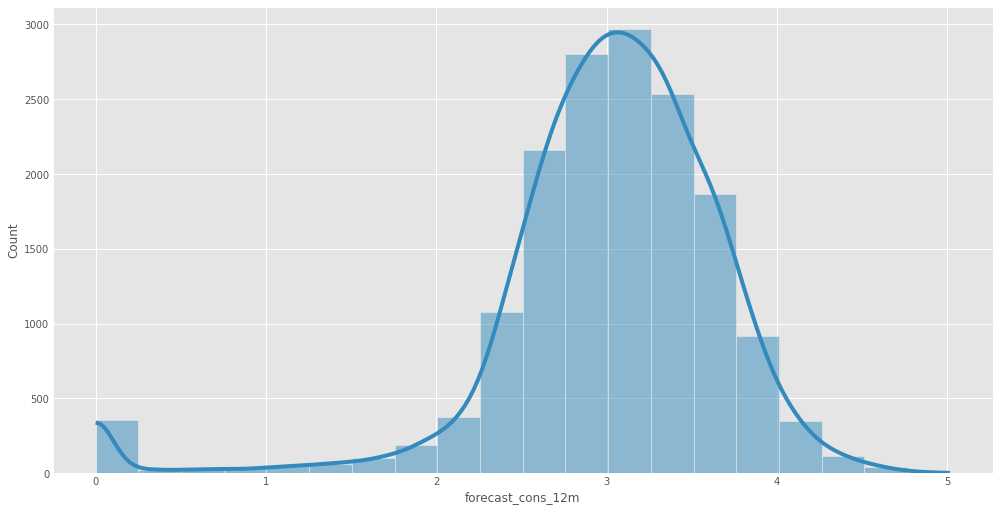

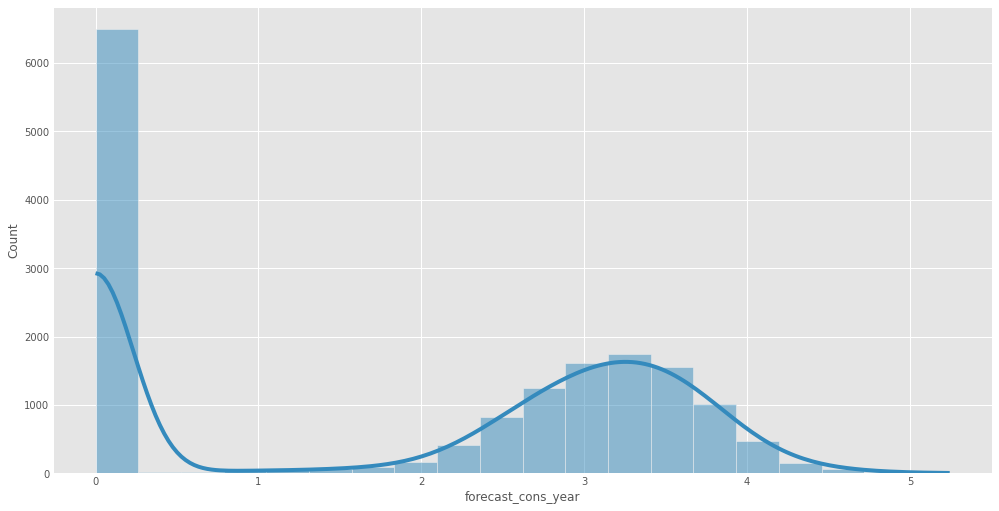

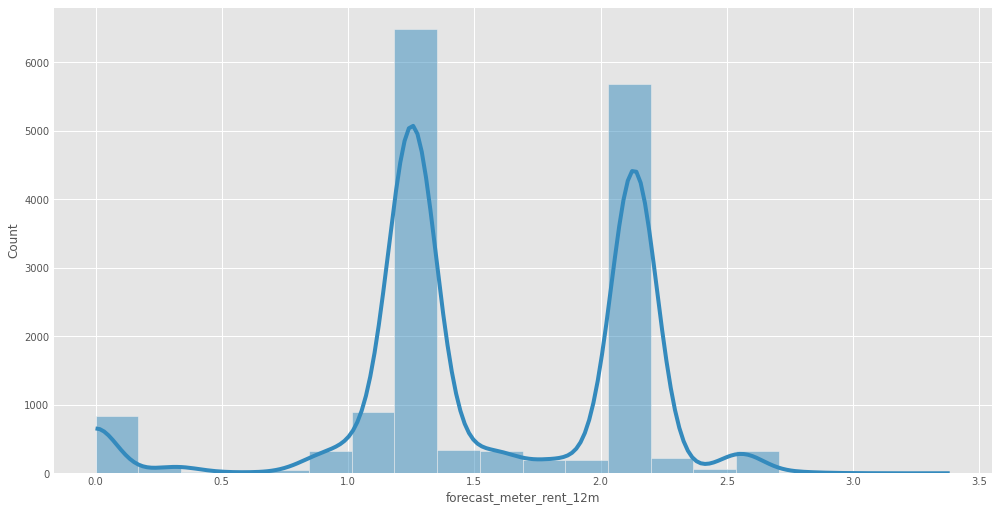

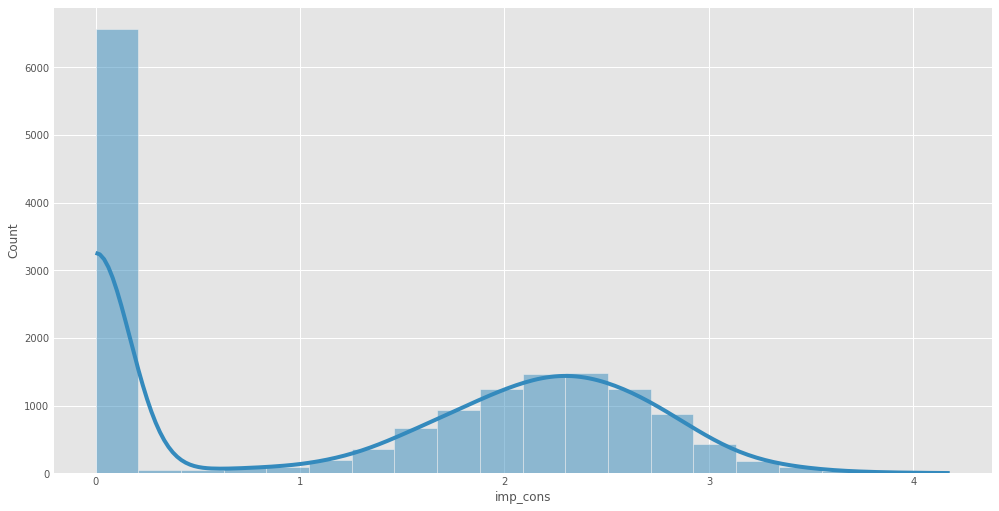

In [29]:
plt.style.use("ggplot")
sns.histplot(data1["forecast_cons_12m"],bins = 20,kde = True)
plt.show()
sns.histplot(data1["forecast_cons_year"],bins = 20 , kde = True)
plt.show()
sns.histplot(data1["forecast_meter_rent_12m"],bins = 20 , kde = True)
plt.show()
sns.histplot(data1["imp_cons"],bins = 20,kde = True)
plt.show()

In [30]:
data1.loc[data1.net_margin < 0,"net_margin"] = np.nan
data1["net_margin"] = np.log10(data1["net_margin"]+1)

<AxesSubplot:>

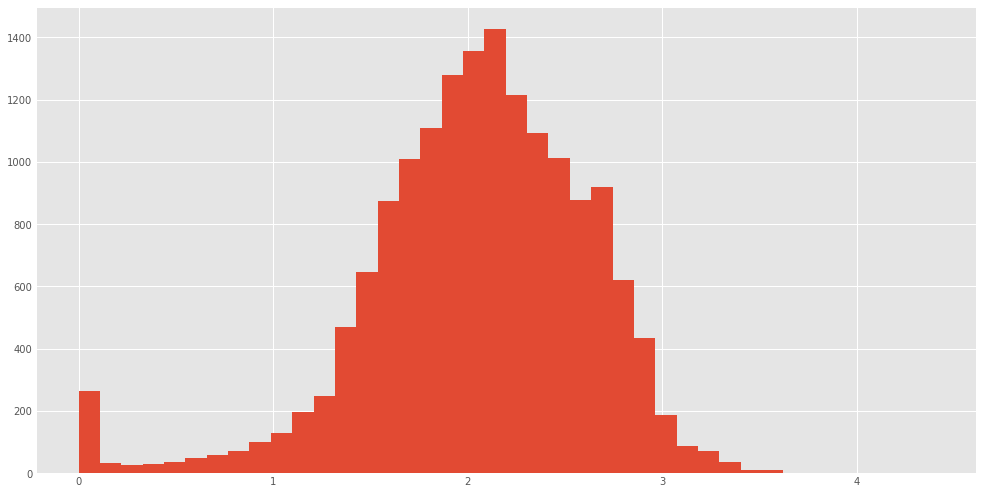

In [31]:
data1["net_margin"].hist(bins = 40)

In [32]:
data1.describe()

,id,activity_new,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,rp,date_renewal_months,date_end_months
count,16096.000000,16096.000000,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,16096.000000,16092.000000,16096.000000,...,16096.000000,16096.000000,15999.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,8047.500000,1.937811,4.283812,0.800300,2.359281,3.006826,1.869956,0.983785,1.549610,0.135928,...,21.460670,1.347788,2.047962,5.030629,2.211046,20.602869,0.099093,2018.112947,6.656561,6.682281
std,4646.659302,3.039399,0.915265,1.748833,1.789067,0.709778,1.612963,5.141470,0.589394,0.026200,...,27.908177,1.459808,0.575191,1.676101,0.853481,21.770600,0.298796,627.273539,3.500424,3.485283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-615.660000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,365.000000,1.000000,1.000000
25%,4023.750000,0.000000,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,...,11.950000,1.000000,1.731991,4.000000,1.000000,12.500000,0.000000,1461.000000,3.000000,4.000000
50%,8047.500000,0.000000,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,1.310481,0.142881,...,20.970000,1.000000,2.086680,5.000000,2.000000,13.856000,0.000000,1834.000000,7.000000,7.000000
75%,12071.250000,5.000000,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,2.122126,0.146348,...,29.640000,1.000000,2.443982,6.000000,3.000000,19.800000,0.000000,2402.000000,10.000000,10.000000
max,16095.000000,9.000000,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,3.382502,0.273963,...,374.640000,32.000000,4.390434,16.000000,4.000000,500.000000,1.000000,5925.000000,12.000000,12.000000


## Treating Outliers

In [33]:
def replace_outliers_z_score(dataframe, column, Z=3):
    from scipy.stats import zscore
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

    no_outliers = dataframe[column].isnull().sum()
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

 # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [34]:
data1 = replace_outliers_z_score(data1,"cons_12m")
data1 = replace_outliers_z_score(data1,"cons_gas_12m")
data1 = replace_outliers_z_score(data1,"cons_last_month")
data1 = replace_outliers_z_score(data1,"forecast_cons_12m")
#data1 = replace_outliers_z_score(data1,"forecast_cons_year")
data1 = replace_outliers_z_score(data1,"forecast_discount_energy")
data1 = replace_outliers_z_score(data1,"forecast_meter_rent_12m")
data1 = replace_outliers_z_score(data1,"forecast_price_energy_p1")
data1 = replace_outliers_z_score(data1,"forecast_price_energy_p2")
data1 = replace_outliers_z_score(data1,"forecast_price_pow_p1")
data1 = replace_outliers_z_score(data1,"imp_cons")
data1 = replace_outliers_z_score(data1,"margin_gross_pow_ele")
data1 = replace_outliers_z_score(data1,"margin_net_pow_ele")
data1 = replace_outliers_z_score(data1,"net_margin")
data1 = replace_outliers_z_score(data1,"pow_max")
data1 = replace_outliers_z_score(data1,"date_end_months")
data1 = replace_outliers_z_score(data1,"date_renewal_months")

Replaced: 27  outliers in  cons_12m
Replaced: 6  outliers in  cons_gas_12m
Replaced: 46  outliers in  cons_last_month
Replaced: 41  outliers in  forecast_cons_12m
Replaced: 0  outliers in  forecast_discount_energy
Replaced: 4  outliers in  forecast_meter_rent_12m
Replaced: 0  outliers in  forecast_price_energy_p1
Replaced: 0  outliers in  forecast_price_energy_p2
Replaced: 0  outliers in  forecast_price_pow_p1
Replaced: 27  outliers in  imp_cons
Replaced: 0  outliers in  margin_gross_pow_ele
Replaced: 0  outliers in  margin_net_pow_ele
Replaced: 97  outliers in  net_margin
Replaced: 0  outliers in  pow_max
Replaced: 0  outliers in  date_end_months
Replaced: 0  outliers in  date_renewal_months


In [35]:
data1.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,rp,date_renewal_months,date_end_months
0,4666,7,5,5.490346,0.000000,4.001128,4.423595,4.001128,0.0,2.556652,...,-41.76,1,3.238889,3,2,18.402044,0,1460,11.0,11.0
1,2361,0,3,4.327104,4.739944,0.000000,3.085953,0.000000,0.0,0.444045,...,25.44,2,2.832503,3,3,43.648000,1,1096,6.0,6.0
2,13250,0,4,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,...,16.38,1,1.298635,6,1,13.800000,0,2566,8.0,8.0
3,7430,0,3,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,...,28.60,1,0.880814,6,1,13.856000,0,2192,4.0,4.0
4,11748,0,5,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,...,30.22,1,1.422590,6,1,13.200000,0,2192,3.0,3.0


We have replaced the outliers with the mean so that we can get a more gaussian distribution.

In [36]:
data1.to_csv("Prepared_data")

-----------------------------------------------------------------------------------------------------------------------

## History data

In [15]:
data2 = pd.read_csv("final_data2.csv")

In [16]:
data2.head()

,Unnamed: 0,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


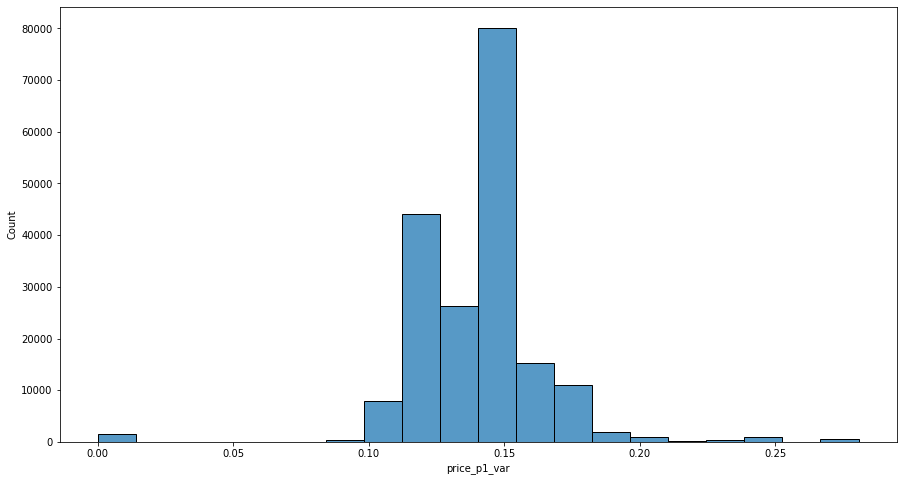

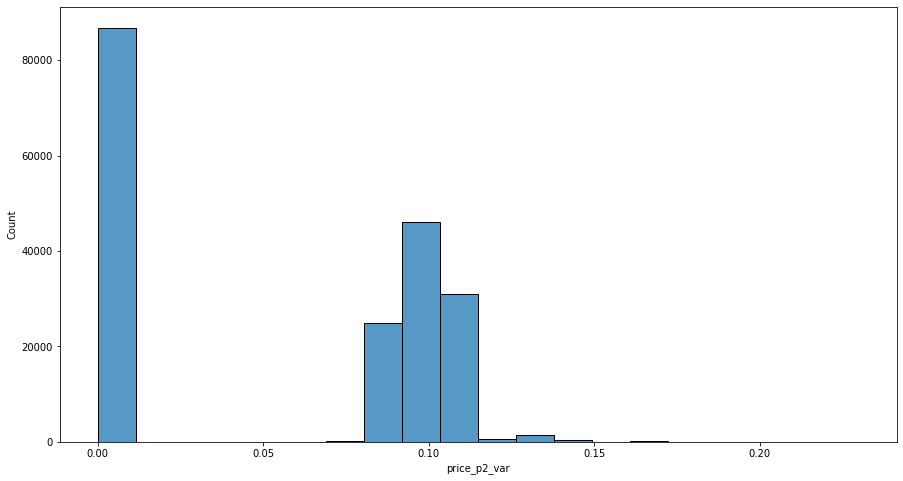

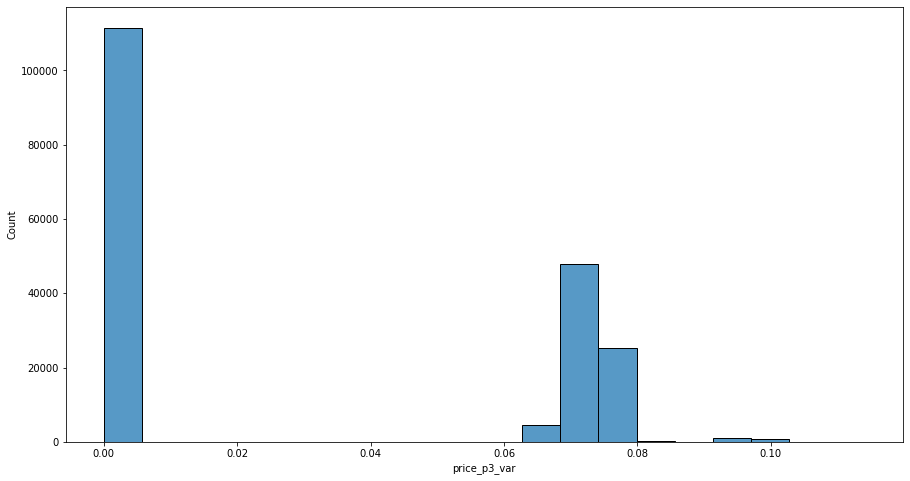

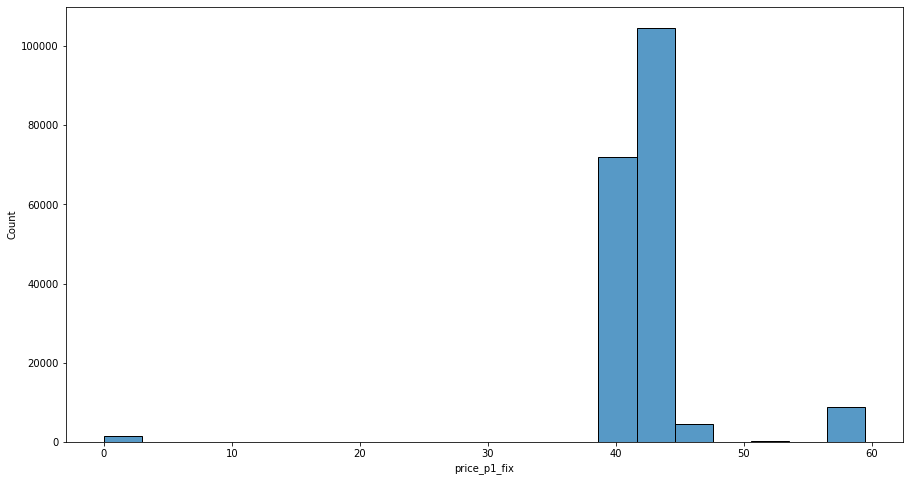

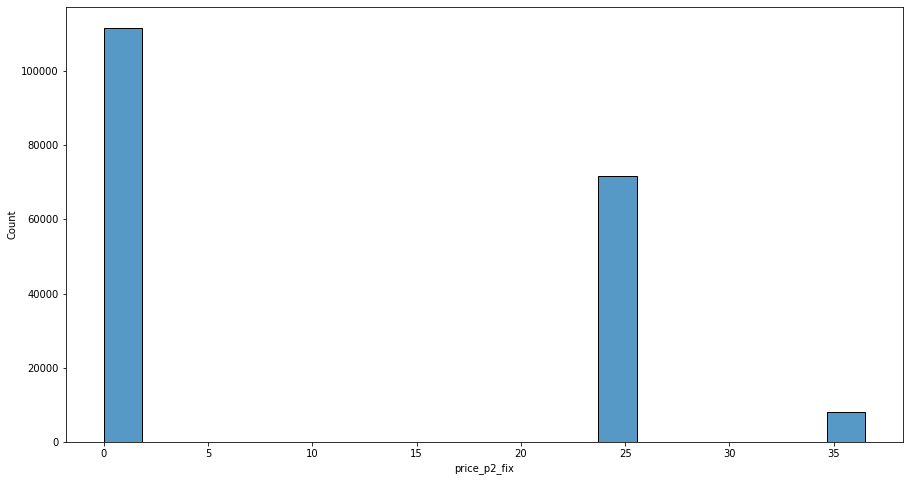

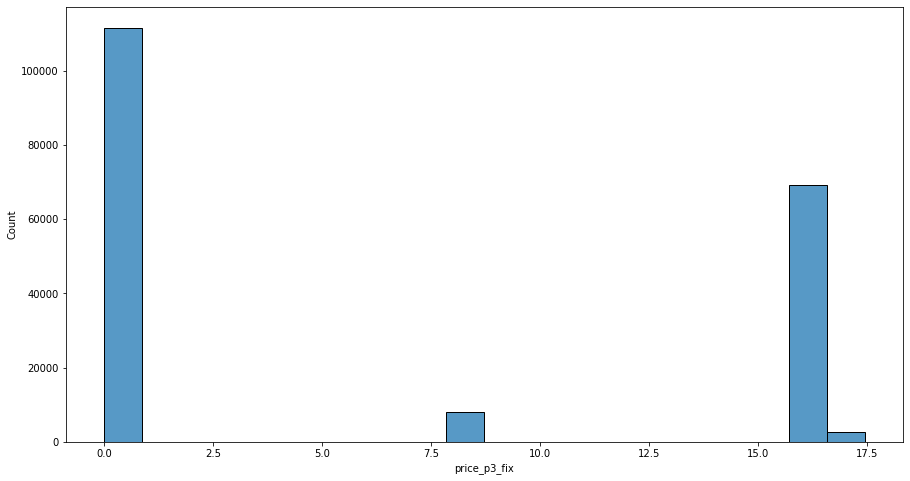

In [17]:
for i in ["price_p1_var","price_p2_var","price_p3_var","price_p1_fix","price_p2_fix","price_p3_fix"]:
    sns.histplot(data2[i],bins = 20)
    plt.show()

In [18]:
mean_year = data2.groupby("id").mean()

In [37]:
mean_year.reset_index(inplace = True)

In [38]:
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
 "price_p2_var": "mean_year_price_p2_var",
"price_p3_var": "mean_year_price_p3_var",
"price_p1_fix": "mean_year_price_p1_fix",
"price_p2_fix": "mean_year_price_p2_fix",
"price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [39]:
mean_year.head(3)

,id,Unnamed: 0,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,72168.5,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,157114.5,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,168215.5,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000


In [41]:
mean_year["id"] = le.fit_transform(mean_year["id"])

In [43]:
mean_year.to_csv("Prepared_data2.csv")